In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

df["Lifestyle"] = ((1 - df["Smoker"]) * 1.5) + \
                  ((1 - df["HvyAlcoholConsump"]) * 2) + \
                  ((df["PhysActivity"]) * 2) + \
                  ((df["Fruits"]) * 0.75) + \
                  ((df["Veggies"]) * 1.25) + \
                  ((6 - df["GenHlth"]) * 0.5)

df["Hlth_issues"] = df["HighBP"] + df["HighChol"] + df["Stroke"] + df["HeartDiseaseorAttack"] + df["DiffWalk"]

**Lifestyle** - это критерий, который может быть добавлен в приложение по сбору данных у пользователей. Он представляет собой совокупность различных факторов, которые по нашему мнению могут описать образ жизни пациента.

**Hlth_issues** - это критерий, который также может быть добавлен в приложение по сбору данных у пользователей. Он представляет собой совокупность различных факторов, которые по нашему мнению описивыет проблемы со здоровьем у пациента.

In [112]:
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Lifestyle,Hlth_issues
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,3.75,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,5.50,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,4.75,3.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,9.50,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,9.50,2.0


# 1.



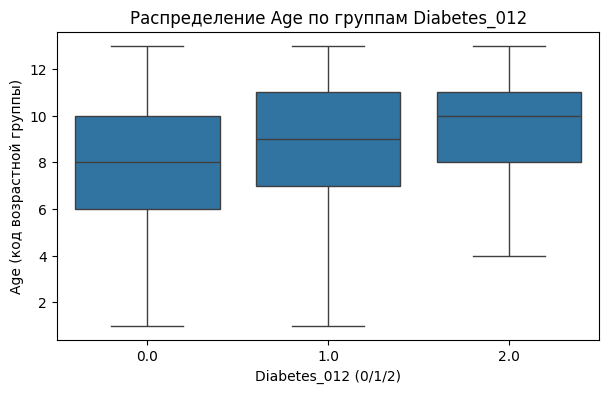

In [113]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Diabetes_012", y="Age", data=df, showfliers=False)
plt.title("Распределение Age по группам Diabetes_012")
plt.xlabel("Diabetes_012 (0/1/2)")
plt.ylabel("Age (код возрастной группы)")
plt.show()

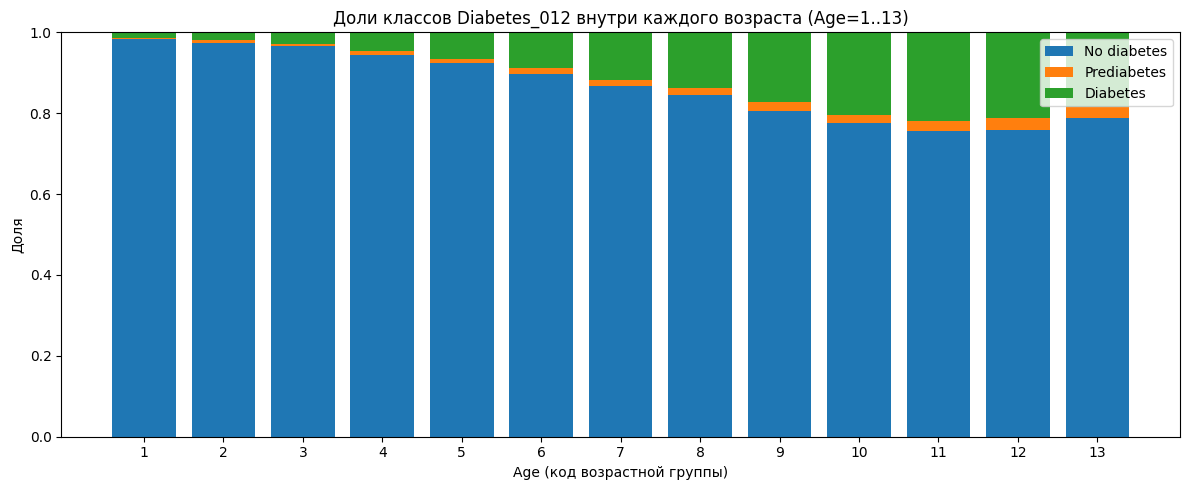

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ct = (
    pd.crosstab(df["Age"], df["Diabetes_012"], normalize="index")
      .reindex(index=range(1, 14), fill_value=0)
      .reindex(columns=[0, 1, 2], fill_value=0)
)

x = np.arange(len(ct.index))
bottom = np.zeros(len(ct.index))

plt.figure(figsize=(12, 5))
for cls in [0, 1, 2]:
    plt.bar(x, ct[cls].values, bottom=bottom, label={0:"No diabetes", 1:"Prediabetes", 2:"Diabetes"}[cls])
    bottom += ct[cls].values

plt.xticks(x, ct.index)
plt.ylim(0, 1)
plt.title("Доли классов Diabetes_012 внутри каждого возраста (Age=1..13)")
plt.xlabel("Age (код возрастной группы)")
plt.ylabel("Доля")
plt.legend()
plt.tight_layout()
plt.show()

# Гипотеза 1
**Нулевая гипотеза** 𝐻0: Вероятность диабета не зависит от возрастной группы
.

**Альтернативная гипотеза** 𝐻1: Существует хотя бы одна возрастная группа, для которой вероятность диабета отличается.

In [115]:
df['Diabetes'] = df['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1)

In [116]:
contingency_age = pd.crosstab(df['Age'], df['Diabetes'])
chi2, p_age, dof, ex = chi2_contingency(contingency_age)
print(f"Age vs Diabetes: chi2={chi2:.3f}, p={p_age:.4f}")

Age vs Diabetes: chi2=9539.412, p=0.0000


# Почему выбрали такой статистический тест?

**Тест:** χ²-тест

**Почему:**

Age — категориальная переменная с несколькими уровнями

Diabetes — бинарная

χ²-тест проверяет, есть ли статистически значимая зависимость между двумя категориальными переменными

# 2.



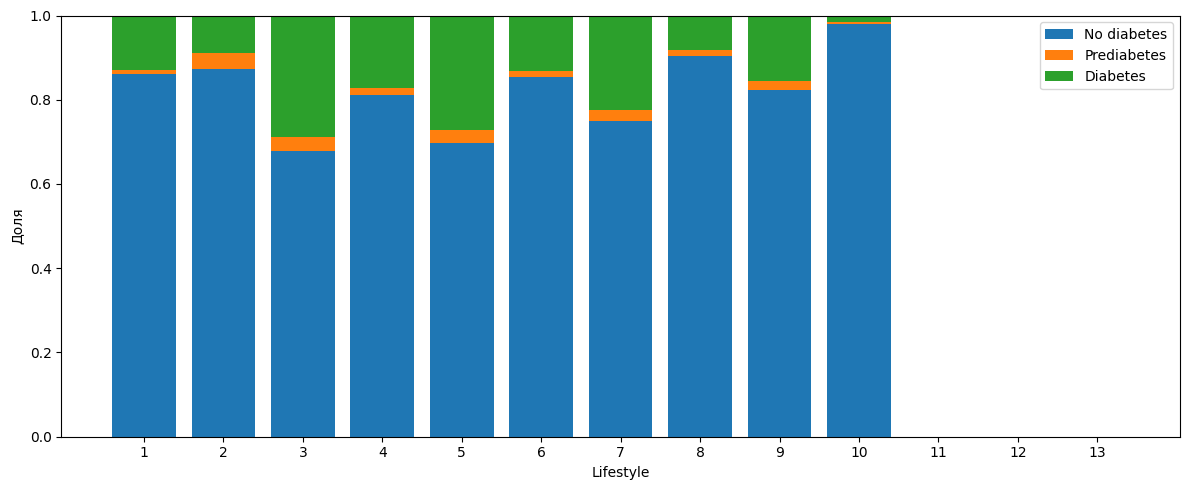

In [130]:
ct = (
    pd.crosstab(df["Lifestyle"], df["Diabetes_012"], normalize="index")
      .reindex(index=range(1, 14), fill_value=0)
      .reindex(columns=[0, 1, 2], fill_value=0)
)

x = np.arange(len(ct.index))
bottom = np.zeros(len(ct.index))

plt.figure(figsize=(12, 5))
for cls in [0, 1, 2]:
    plt.bar(x, ct[cls].values, bottom=bottom, label={0:"No diabetes", 1:"Prediabetes", 2:"Diabetes"}[cls])
    bottom += ct[cls].values

plt.xticks(x, ct.index)
plt.ylim(0, 1)
plt.title("")
plt.xlabel("Lifestyle")
plt.ylabel("Доля")
plt.legend()
plt.tight_layout()
plt.show()

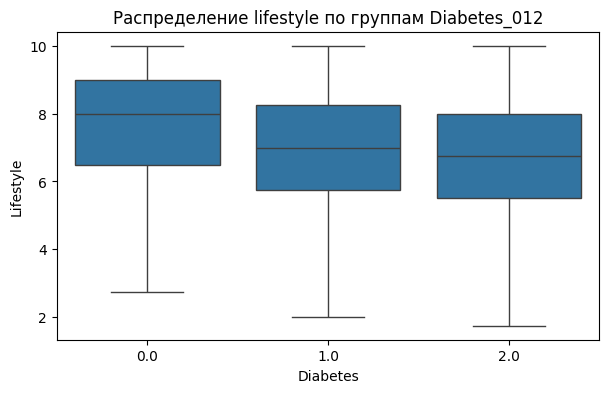

In [131]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Diabetes_012", y="Lifestyle", data=df, showfliers=False)
plt.title("Распределение lifestyle по группам Diabetes_012")
plt.xlabel("Diabetes")
plt.ylabel("Lifestyle")
plt.show()

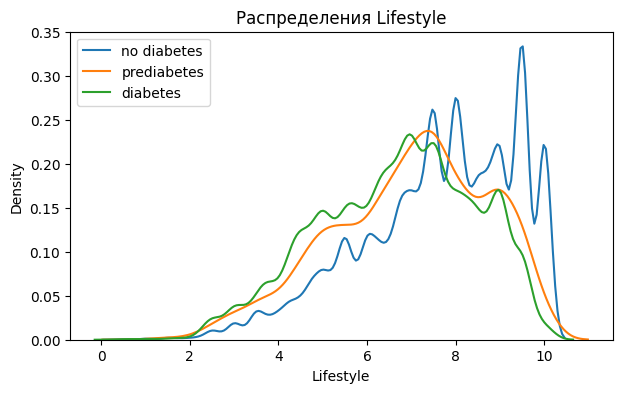

In [119]:
plt.figure(figsize=(7,4))
sns.kdeplot(df[df["Diabetes_012"]==0]["Lifestyle"], label="no diabetes")
sns.kdeplot(df[df["Diabetes_012"]==1]["Lifestyle"], label="prediabetes")
sns.kdeplot(df[df["Diabetes_012"]==2]["Lifestyle"], label="diabetes")
plt.title("Распределения Lifestyle")
plt.xlabel("Lifestyle")
plt.ylabel("Density")
plt.legend()
plt.show()


#Гипотеза 2
**Нулевая гипотеза** 𝐻0: Значение Lifestyle не связано с вероятностью диабета.

**Альтернативная гипотеза** 𝐻1: Значение Lifestyle связано с вероятностью диабета.

In [120]:
model_lifestyle = smf.logit('Diabetes ~ Lifestyle', data=df).fit()
print(model_lifestyle.summary())
print("Odds Ratios (Lifestyle):")
print(np.exp(model_lifestyle.params))

Optimization terminated successfully.
         Current function value: 0.419245
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253678
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Dec 2025   Pseudo R-squ.:                 0.03765
Time:                        14:12:24   Log-Likelihood:            -1.0635e+05
converged:                       True   LL-Null:                   -1.1052e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2632      0.021     12.415      0.000       0.222       0.305
Lifestyle     -0.2702      0.

# Почему выбрали такой статистический тест?
**Тест:** Логистическая регрессия

**Почему:**

Lifestyle — непрерывная или квазинепрерывная переменная

Diabetes — бинарная

Логистическая регрессия оценивает влияние непрерывного предиктора на вероятность события и позволяет получить коэффициенты и odds ratio

# 3.



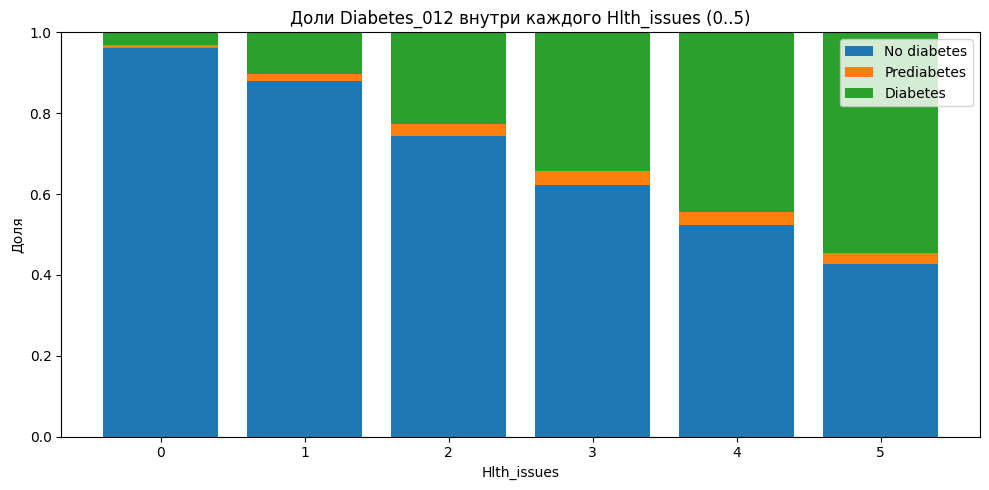

In [121]:
ct = (
    pd.crosstab(df["Hlth_issues"], df["Diabetes_012"], normalize="index")
      .reindex(index=range(0, 6), fill_value=0)
      .reindex(columns=[0, 1, 2], fill_value=0)
)

x = np.arange(len(ct.index))
bottom = np.zeros(len(ct.index))

plt.figure(figsize=(10,5))
for cls in [0, 1, 2]:
    plt.bar(x, ct[cls].values, bottom=bottom,
            label={0:"No diabetes", 1:"Prediabetes", 2:"Diabetes"}[cls])
    bottom += ct[cls].values

plt.xticks(x, ct.index)
plt.ylim(0, 1)
plt.title("Доли Diabetes_012 внутри каждого Hlth_issues (0..5)")
plt.xlabel("Hlth_issues")
plt.ylabel("Доля")
plt.legend()
plt.tight_layout()
plt.show()

# Гипотеза 3
**Нулевая гипотеза** 𝐻0: при разном значении метрики (Hlth_issues) вероятность заболеть диабетом одинаковая.

**Альтернативная гипотеза** 𝐻1: при разном значении метрики (Hlth_issues) вероятность заболеть диабетом разная.

In [122]:
model_health = smf.logit('Diabetes ~ Hlth_issues', data=df).fit()
print(model_health.summary())
print("Odds Ratios (Hlth_issues):")
print(np.exp(model_health.params))

Optimization terminated successfully.
         Current function value: 0.379995
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253678
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Dec 2025   Pseudo R-squ.:                  0.1277
Time:                        14:12:25   Log-Likelihood:                -96397.
converged:                       True   LL-Null:                   -1.1052e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.8443      0.011   -269.818      0.000      -2.865      -2.824
Hlth_issues     0.7863    

# Почему выбрали такой статистический тест?
**Тест:** Логистическая регрессия

**Почему:**

Hlth_issues — счётная переменная (количество хронических проблем)

Diabetes — бинарная

Логистическая регрессия корректно оценивает, как увеличение количества проблем со здоровьем влияет на вероятность диабета.

# 4.

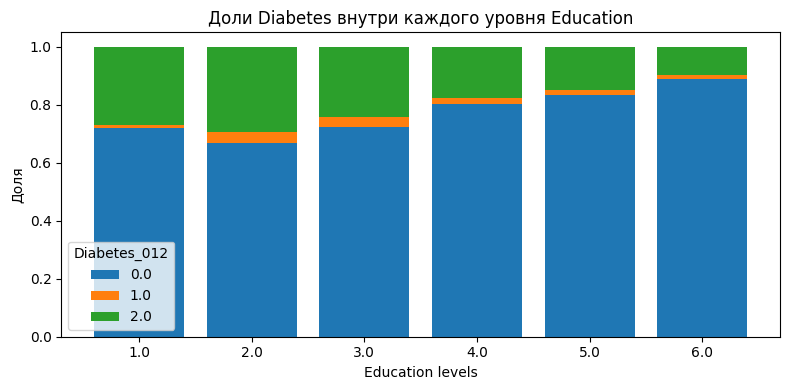

In [123]:
ct = pd.crosstab(df["Education"], df["Diabetes_012"], normalize="index").sort_index()

plt.figure(figsize=(8,4))
bottom = np.zeros(len(ct))
x = np.arange(len(ct.index))
for cls in ct.columns:
    plt.bar(x, ct[cls].values, bottom=bottom, label=str(cls))
    bottom += ct[cls].values

plt.xticks(x, ct.index)
plt.title("Доли Diabetes внутри каждого уровня Education")
plt.xlabel("Education levels")
plt.ylabel("Доля")
plt.legend(title="Diabetes_012")
plt.tight_layout()
plt.show()


# Гипотеза 4
**Нулевая гипотеза** 𝐻0:Вероятность диабета не зависит от уровня образования.

**Альтернативная гипотеза** 𝐻1:Вероятность диабета зависит от уровня образования.

In [124]:
contingency_edu = pd.crosstab(df['Education'], df['Diabetes'])
chi2, p_edu, dof, ex = chi2_contingency(contingency_edu)
print(f"Education vs Diabetes: chi2={chi2:.3f}, p={p_edu:.4f}")

Education vs Diabetes: chi2=4541.124, p=0.0000


# Почему выбрали такой статистический тест?
**Тест:** χ²-тест

**Почему:**

Education — категориальная переменная

Diabetes — бинарная

Проверяем, есть ли статистическая зависимость между уровнем образования и наличием диабета

# 5.

<Figure size 1000x600 with 0 Axes>

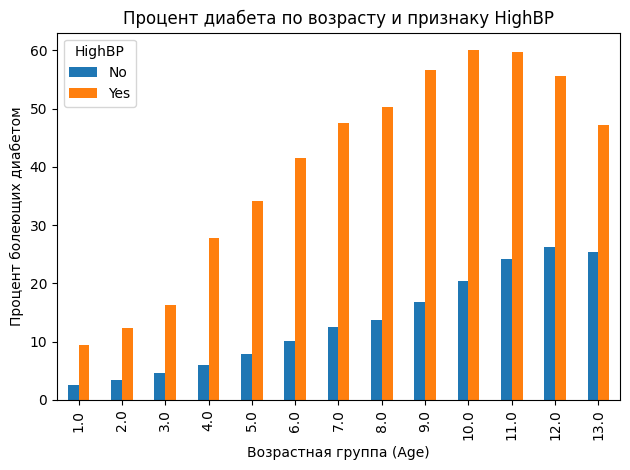

<Figure size 1000x600 with 0 Axes>

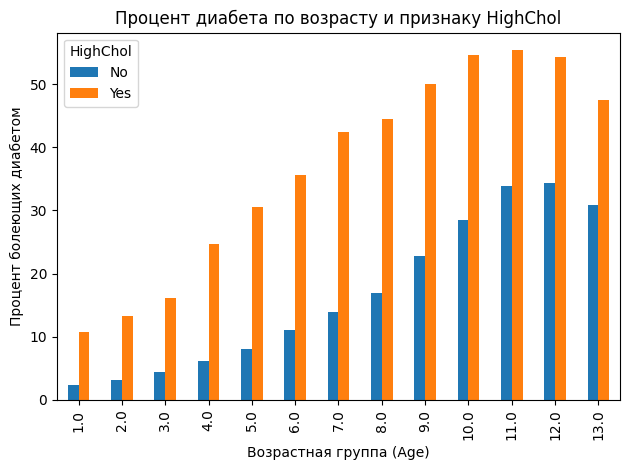

In [125]:
grouped = df.groupby(["Age", "HighBP"])["Diabetes_012"].mean().reset_index()
grouped["DiabetesPercent"] = grouped["Diabetes_012"] * 100

pivot = grouped.pivot(index="Age", columns="HighBP", values="DiabetesPercent")

plt.figure(figsize=(10, 6))
pivot.plot(kind="bar")
plt.xlabel("Возрастная группа (Age)")
plt.ylabel("Процент болеющих диабетом")
plt.title("Процент диабета по возрасту и признаку HighBP")
plt.legend(title="HighBP",labels=["No", "Yes"])
plt.tight_layout()
plt.show()

grouped = df.groupby(["Age", "HighChol"])["Diabetes_012"].mean().reset_index()
grouped["DiabetesPercent"] = grouped["Diabetes_012"] * 100

pivot = grouped.pivot(index="Age", columns="HighChol", values="DiabetesPercent")

plt.figure(figsize=(10, 6))
pivot.plot(kind="bar")
plt.xlabel("Возрастная группа (Age)")
plt.ylabel("Процент болеющих диабетом")
plt.title("Процент диабета по возрасту и признаку HighChol")
plt.legend(title="HighChol",labels=["No", "Yes"])
plt.tight_layout()
plt.show()

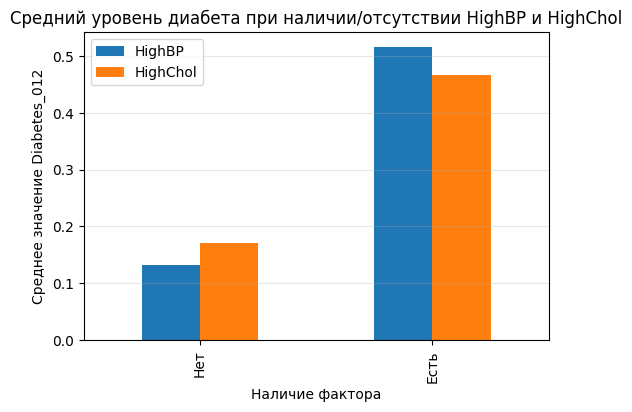

In [126]:
bp_diabetes = df.groupby("HighBP")["Diabetes_012"].mean()
chol_diabetes = df.groupby("HighChol")["Diabetes_012"].mean()

compare_df = pd.DataFrame({
    "HighBP": bp_diabetes,
    "HighChol": chol_diabetes
}).rename(index={0: "Нет", 1: "Есть"})

compare_df.plot(kind="bar", figsize=(6,4))
plt.title("Средний уровень диабета при наличии/отсутствии HighBP и HighChol")
plt.ylabel("Среднее значение Diabetes_012")
plt.xlabel("Наличие фактора")
plt.legend(["HighBP", "HighChol"])
plt.grid(axis="y", alpha=0.3)
plt.show()

# Гипотеза 5
**Нулевая гипотеза** 𝐻0: Влияние HighBP и HighChol на вероятность диабета одинаково
.

**Альтернативная гипотеза** 𝐻1: Влияние HighBP на вероятность диабета сильнее/слабее, чем HighChol.

In [127]:
count = df.groupby('Sex')['Diabetes'].sum().values
nobs = df.groupby('Sex')['Diabetes'].count().values
stat, p_sex = proportions_ztest(count, nobs)
print(f"Sex vs Diabetes: z={stat:.3f}, p={p_sex:.4f}")

Sex vs Diabetes: z=-14.911, p=0.0000


# Почему выбрали статистический тест?
**Тест:** Z-тест

**Почему:**

Sex — бинарная

Diabetes — бинарная

Z-тест проверяет, отличается ли доля диабета между двумя группами (мужчины и женщины)

# 6.

<Figure size 1000x600 with 0 Axes>

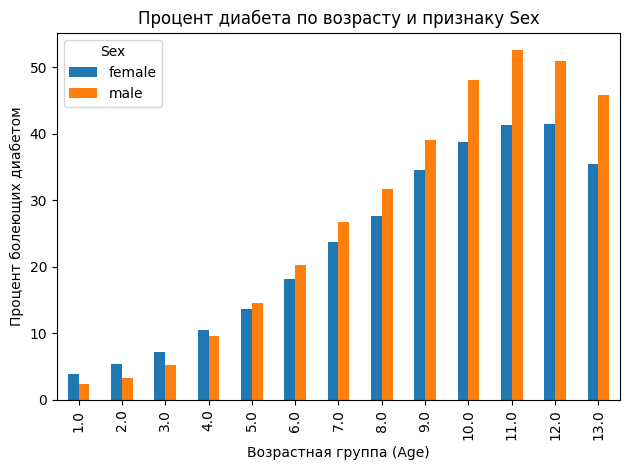

In [128]:
grouped = df.groupby(["Age", "Sex"])["Diabetes_012"].mean().reset_index()
grouped["DiabetesPercent"] = grouped["Diabetes_012"] * 100

pivot = grouped.pivot(index="Age", columns="Sex", values="DiabetesPercent")

plt.figure(figsize=(10, 6))
pivot.plot(kind="bar")
plt.xlabel("Возрастная группа (Age)")
plt.ylabel("Процент болеющих диабетом")
plt.title("Процент диабета по возрасту и признаку Sex")
plt.legend(title="Sex",labels=["female", "male"])
plt.tight_layout()
plt.show()

# Гипотеза 6
**Нулевая гипотеза** 𝐻0: Вероятность диабета одинакова у мужчин и женщин
.

**Альтернативная гипотеза** 𝐻1: Вероятность диабета различается по полу.

In [129]:
model = smf.logit('Diabetes ~ HighBP + HighChol + Age', data=df).fit(disp=0)

print("Сравнение влияния HighBP и HighChol на диабет:")
print(f"HighBP: коэффициент = {model.params['HighBP']:.3f}, шансы = {np.exp(model.params['HighBP']):.3f}")
print(f"HighChol: коэффициент = {model.params['HighChol']:.3f}, шансы = {np.exp(model.params['HighChol']):.3f}")

p_wald = model.wald_test([0, 1, -1, 0]).pvalue
print(f"Wald-тест (равенство эффектов): p = {p_wald:.4g}")

if p_wald < 0.05:
    stronger = "HighBP" if model.params['HighBP'] > model.params['HighChol'] else "HighChol"
    weaker = "HighChol" if stronger == "HighBP" else "HighBP"
    print(f"Вывод: {stronger} значимо сильнее влияет на риск диабета, чем {weaker}")
else:
    print("Вывод: статистически значимой разницы в влиянии нет")
print()

Сравнение влияния HighBP и HighChol на диабет:
HighBP: коэффициент = 1.191, шансы = 3.291
HighChol: коэффициент = 0.747, шансы = 2.111
Wald-тест (равенство эффектов): p = 4.789e-117
Вывод: HighBP значимо сильнее влияет на риск диабета, чем HighChol



/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


# Почему выбрали такой статистический тест?
**Тесты:**

**1.Логистическая регрессия**

HighBP и HighChol — бинарные предикторы

Diabetes — бинарная

Позволяет оценить влияние каждого фактора и получить коэффициенты и odds ratio.

**2.Wald-test**

Проверка гипотезы H₀

Позволяет статистически проверить, отличается ли сила влияния HighBP и HighChol на вероятность диабета